In [2]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Filepath
filepath = "Cleaned_Randomized_df.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath)
df.shape

(1995, 11)

In [4]:
df.head()

,Unnamed: 0,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$
0,103,Avatar,2009,Action,PG-13,162,Twentieth Century Fox,"$237,000,000","$749,766,139","$1,993,811,448","$2,743,577,587"
1,1,Star Wars: Episode VII - The Force Awakens,2015,Action,PG-13,138,Walt Disney Studios Motion Pictures,"$245,000,000","$936,662,225","$1,131,561,399","$2,068,223,624"
2,0,Jurassic World,2015,Sci-Fi,PG-13,124,Universal Pictures,"$150,000,000","$652,270,625","$1,018,130,012","$1,670,400,637"
3,188,The Lion King,2019,Adventure,PG,118,Walt Disney Studios Motion Pictures,"$260,000,000","$543,638,043","$1,113,305,351","$1,656,943,394"
4,128,The Avengers,2012,Adventure,PG-13,143,Walt Disney Studios Motion Pictures,"$220,000,000","$623,357,910","$895,455,078","$1,518,812,988"


In [5]:
df["Distributor"].value_counts()

Distributor
Warner Bros.                         266
Universal Pictures                   252
Twentieth Century Fox                218
Sony Pictures Entertainment (SPE)    182
Paramount Pictures                   173
                                    ... 
IFC Films                              1
EuropaCorp                             1
Neon                                   1
FUNimation Entertainment               1
OTL Releasing                          1
Name: count, Length: 74, dtype: int64

## Question #3: Average run time by year? Correlation between runtime/genre?

#### Average run time by year?

In [6]:
# The average run time by year
average_runtime_by_year = df.groupby('year')['Runtime'].mean()
print(average_runtime_by_year)

year
1999    118.692308
2000    109.791045
2001    106.826087
2002    105.015873
2003    107.224299
2004    107.279279
2005    109.872549
2006    105.564356
2007    110.360000
2008    106.570000
2009    108.050000
2010    106.940678
2011    106.641026
2012    107.415730
2013    109.942857
2014    109.881720
2015    111.634615
2016    112.329787
2017    112.358696
2018    110.244186
2019    112.479592
2020    105.285714
Name: Runtime, dtype: float64


#### line graph 

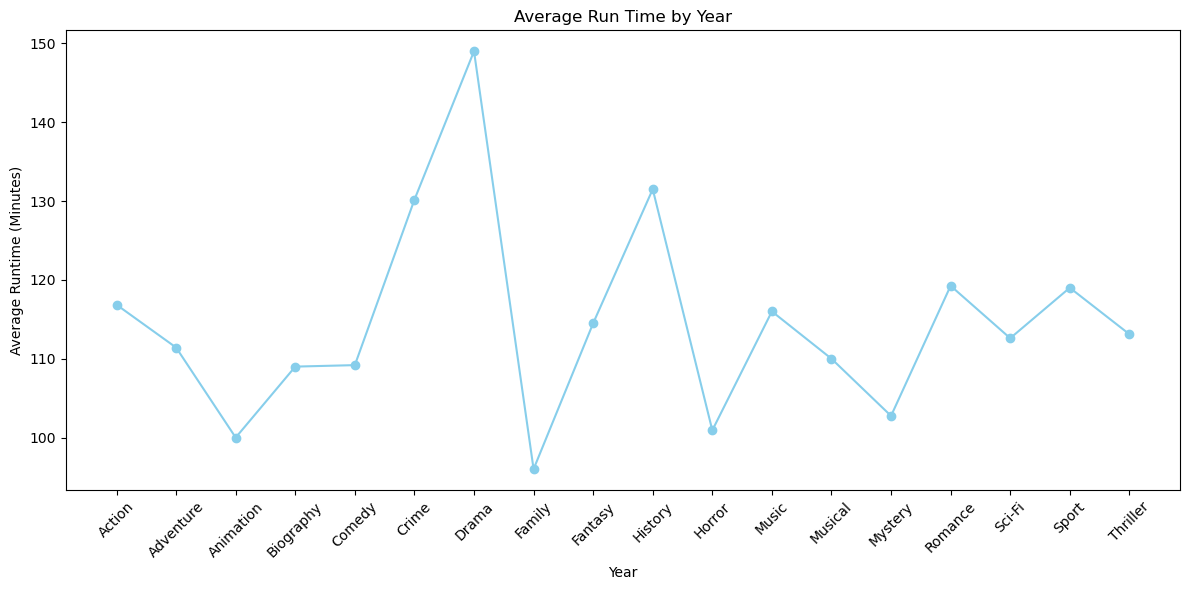

In [38]:
# Extract years and runtimes
years = average_runtime_by_year.index
runtimes = average_runtime_by_year.values

# Create line graph
plt.figure(figsize=(12, 6))
plt.plot(years, runtimes, marker='o', linestyle='-', color='skyblue')
plt.title('Average Run Time by Year')
plt.xlabel('Year')
plt.ylabel('Average Runtime (Minutes)')
plt.xticks(years, rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### The average run time by year (1999-2019)

In [7]:
# Number of genres
df["main_genre"].nunique()

21

In [34]:
# Initialize lists to store results
years = []
longest_runtime_genres = []
longest_runtimes = []

# For loop incrementing by year from 1999 to 2019
for year in range(1999, 2020):  # The range function goes up to but does not include the second parameter
    # Filter the DataFrame for the current year
    df_year = df[df['year'] == year]
    
    # Group by genre and calculate the average runtime
    if not df_year.empty:
        average_runtime_by_year = df_year.groupby('main_genre')['Runtime'].mean()
        
        # Find the genre with the longest average runtime
        max_genre = average_runtime_by_year.idxmax()
        max_run_time = average_runtime_by_year.max()
        
        # Append results to the lists
        years.append(year)
        longest_runtime_genres.append(max_genre)
        longest_runtimes.append(max_run_time)
        
        # Print the results
        print(f"Year: {year}")
        print(average_runtime_by_year)
        print(f"Maximum Avg runtime")
        print(f"Genre: {max_genre}")
        print(f"Max Avg Runtime: {max_run_time}")
        print("\n")
    else:
        # Append results indicating no data available
        years.append(year)
        longest_runtime_genres.append('No data')
        longest_runtimes.append(0)

# Create a DataFrame from the results for easier plotting
results_df = pd.DataFrame({
    'Year': years,
    'Genre': longest_runtime_genres,
    'Runtime': longest_runtimes
})



Year: 1999
main_genre
Adventure    110.0
Biography    118.0
Comedy       107.5
Drama        122.0
Family        84.0
Fantasy      189.0
Mystery      106.0
Sci-Fi       132.0
Sport        146.0
Thriller     105.0
Name: Runtime, dtype: float64
Maximum Avg runtime
Genre: Fantasy
Max Avg Runtime: 189.0


Year: 2000
main_genre
Action       120.833333
Adventure    122.000000
Animation     83.000000
Biography    113.000000
Comedy       107.600000
Crime        101.125000
Drama        188.000000
Family        92.000000
Fantasy      104.000000
Horror       123.000000
Musical       89.000000
Mystery      133.000000
Romance      109.500000
Sci-Fi       106.333333
Sport        108.000000
Thriller     113.750000
Western      110.000000
Name: Runtime, dtype: float64
Maximum Avg runtime
Genre: Drama
Max Avg Runtime: 188.0


Year: 2001
main_genre
Action        98.500000
Adventure    107.600000
Animation     87.000000
Comedy        95.062500
Crime        109.333333
Drama        111.000000
Family       1

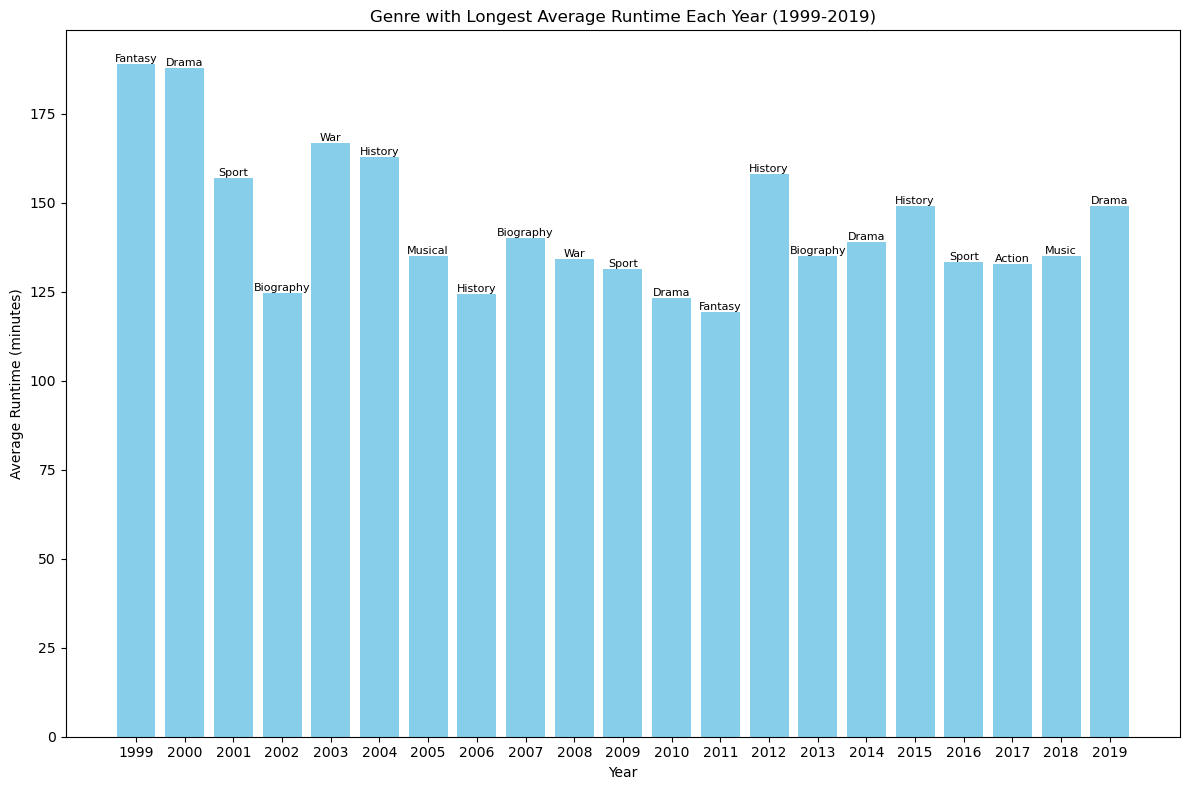

In [36]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(results_df['Year'], results_df['Runtime'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.title('Genre with Longest Average Runtime Each Year (1999-2019)')
plt.xticks(results_df['Year'])

# Annotate bars with genre names
for bar, genre in zip(bars, results_df['Genre']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, genre, ha='center', va='bottom', fontsize=8) #, rotation=90)

plt.tight_layout()
plt.show()